### Importacion de Librerias y Modulos

In [27]:
from functions.datos import Simulador_Ventas
import functions.limpiar_datos as ld
import functions.visualizacion as vs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Generar archivos CSV para Ventas y Clientes

### Contenido:
Modulo datos.py creado para generar csv bajo los siguientes lineamientos:

1. Generar dos archivos CSV llamados "ventas.csv" y "clientes.csv" que contengan los datos de ventas y clientes, respectivamente. 
2. Los datos deben ser generados aleatoriamente utilizando funciones de probabilidad (indique en su informe que distribución uso: uniforme, normal u otra).
3. Los valores nulos deben representarse con la palabra "NULL". En el archivo "ventas.csv"
    - La columna "Producto" puede contener hasta un 10% de valores nulos. 
    - En el archivo "clientes.csv", las columnas "Nombre" y "Edad" pueden contener hasta un 5% de valores nulos cada una.

Simula una Venta indicando:
- num_venta = ¿Cuántas ventas te gustaria simular?
- num_clientes ¿Cuántos clientes contemplará?

In [ ]:
num_ventas = 100
num_clientes = 50
Simulador_Ventas(num_ventas,num_clientes)

# Limpieza de Datos

1. Cargar los datos de ventas y clientes desde los archivos CSV generados utilizando Pandas y almacenarlos en DataFrames separados.
2. Realizar una limpieza de datos inicial en ambos DataFrames, manejando los valores nulos y convirtiendo los tipos de datos según sea necesario.
   Documentar en el informe los pasos realizados para la limpieza de datos. Realizar una limpieza de datos inicial en ambos DataFrames, 
   manejando los valores nulos y convirtiendo los tipos de datos según sea necesario. Documentar en el informe los pasos realizados para la limpieza de datos. 

### Ventas:

In [ ]:
df_ventas = ld.LeerArchivo("data/ventas.csv")
df_ventas.head()

El metodo a continuación limpia datos de acuerdo al siguiente algoritmo
> Eliminación de datos nulos ≥ 5% < Imputación de datos nulos 

In [ ]:
df_ventas = ld.Limpiar_Datos(df_ventas,'ventas')
df_ventas.head()

Procederemos a parsear los datos:

In [ ]:
ld.Conversion_Datos(df_ventas,'ventas')
df_ventas.head()

#### Clientes:

In [ ]:
df_clientes = ld.LeerArchivo("data/clientes.csv")
df_clientes.head()

El metodo a continuación limpia datos de acuerdo al siguiente algoritmo
> Eliminación de datos nulos ≥ 5% < Imputación de datos nulos 

In [ ]:
df_clientes = ld.Limpiar_Datos(df_clientes,'clientes')
df_clientes.head()

Procederemos a parsear los datos:

In [ ]:
df_clientes = ld.Conversion_Datos(df_clientes,'clientes')
df_clientes.head()

# Modelado de los Datos

1. Cruzar los DataFrames de películas y ratings utilizando la columna "ID_Cliente" como clave primaria.

In [42]:
merged_df = df_ventas.merge(df_clientes, on='ID_Cliente')
merged_df.head()

,ID_Venta,ID_Cliente,Categoría,Producto,Precio,Cantidad,Nombre,Edad,Genero,Ubicacion
0,1,43,Tecnologia,Lámpara,31359,1,Daniel White,39,Masculino,Sur
1,2,37,Electrónica,Tablet,248113,4,Olivia Hall,46,Femenino,Sur
2,3,49,Hogar,Lavadora,452362,4,Ethan Scott,40,Masculino,Sur
3,4,13,Electrónica,Teléfono,506606,3,Noah Robertson,54,Masculino,Centro
4,5,42,Hogar,Refrigerador,369171,2,Jesus Brown,48,Masculino,Norte


In [44]:
merged_df = merged_df.reindex(columns=['ID_Cliente','Nombre','Edad','Genero','ID_Venta','Categoría','Producto','Precio','Cantidad'])
merged_df. head() #Cambio de disposiccion de las columnas

,ID_Cliente,Nombre,Edad,Genero,ID_Venta,Categoría,Producto,Precio,Cantidad
0,43,Daniel White,39,Masculino,1,Tecnologia,Lámpara,31359,1
1,37,Olivia Hall,46,Femenino,2,Electrónica,Tablet,248113,4
2,49,Ethan Scott,40,Masculino,3,Hogar,Lavadora,452362,4
3,13,Noah Robertson,54,Masculino,4,Electrónica,Teléfono,506606,3
4,42,Jesus Brown,48,Masculino,5,Hogar,Refrigerador,369171,2


2. Calcular el promedio de venta de cada producto utilizando una Serie de Pandas.

In [45]:
Ventas_media = merged_df.groupby('Producto')['Cantidad'].size().to_frame(name="Cantidad").reset_index()# Calcular el promedio de ventas
Ventas_media

,Producto,Cantidad
0,Audífonos,16
1,Bateria,9
2,Batidora,5
3,Cafetera,9
4,Computadora,3
5,Cámara,8
6,Estufa Eléctrica,6
7,Horno Eléctrico,5
8,Laptop,4
9,Lavadora,9


3. Generar una tabla que muestre la cantidad de ventas por Categoria y Precio utilizando las funciones de agregación de Pandas.

In [ ]:
productos_mayor_venta = Ventas_media.nlargest(10, 'count') #Tabla de ventas por categoría y precio
productos_mayor_venta

4. Identificar los 10 Productos con mayor venta y los 10 productos con promedio más bajo utilizando indexación fancy y slicing en el DataFrame cruzado.

In [ ]:
df_combinado_ordenado = merged_df.sort_values(by='Cantidad', ascending=True) #10 productos con mayor venta:
df_combinado_ordenado.head(10)

In [ ]:
productos_menor_promedio = df_combinado_ordenado.head(10) #10 productos con menor promedio:
productos_menor_promedio

# Visualización de los Datos

8.    Crear una visualización básica con Seaborn que muestre la distribución de edades de
los clientes por género.
9.    Guardar los resultados generados en un archivo Excel.

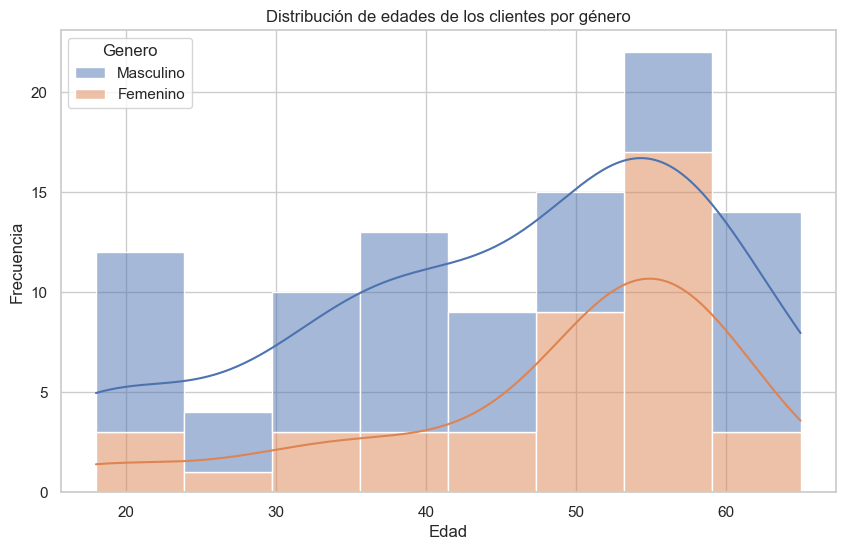

In [28]:
vs.Grafico(merged_df)